In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta

FIRST ANALYTICS WITH THE BARCELONA AIR QUALITY DATASET


In [51]:

file_path = "data/BarcelonaAirQuality_pivoted.csv"
df_barcelona = pd.read_csv(file_path, low_memory=False)
df_barcelona.head()

,CODI EOI,NOM ESTACIO,CO,H2S,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2,Date_time
0,8019003,Barcelona (St. Gervasi),3.0,NaN,NaN,NaN,140.0,62.0,NaN,15.0,NaN,NaN,71.0,42.0,1992-01-01 01:00:00
1,8019003,Barcelona (St. Gervasi),5.3,NaN,NaN,NaN,195.0,66.0,NaN,11.0,NaN,NaN,79.0,43.0,1992-01-01 02:00:00
2,8019003,Barcelona (St. Gervasi),3.7,NaN,NaN,NaN,177.0,64.0,NaN,10.0,NaN,NaN,69.0,46.0,1992-01-01 03:00:00
3,8019003,Barcelona (St. Gervasi),6.1,NaN,NaN,NaN,355.0,52.0,NaN,13.0,NaN,NaN,76.0,49.0,1992-01-01 04:00:00
4,8019003,Barcelona (St. Gervasi),5.6,NaN,NaN,NaN,328.0,54.0,NaN,14.0,NaN,NaN,84.0,48.0,1992-01-01 05:00:00


=0 Values (wrong measurements)

In [83]:
# Contar valores iguales a 0 en cada columna
num_zeros_per_column = df_barcelona.apply(lambda x: (x == 0).sum())

print(num_zeros_per_column)

CODI EOI           0
NOM ESTACIO        0
CO               479
H2S               48
HCNM            1047
HCT                0
NO               195
NO2               40
NOX                0
O3             13484
PM10              99
PM2.5              0
PS                 0
SO2                0
Date_time          0
year               0
month              0
day                0
dtype: int64


In [35]:
print(f"Number of rows:{df_barcelona.shape[0]}")

Number of rows:1565141


1- General Time Trends

Time Series Plots: Show how the pollutant levels vary across time


In [53]:
df_barcelona['Date_time'] = pd.to_datetime(df_barcelona['Date_time'])

df_barcelona['year'] = df_barcelona['Date_time'].dt.year
df_barcelona['month'] = df_barcelona['Date_time'].dt.month
df_barcelona['day'] = df_barcelona['Date_time'].dt.day


In [56]:
print(df_barcelona.columns)

Index(['CODI EOI', 'NOM ESTACIO', 'CO', 'H2S', 'HCNM', 'HCT', 'NO', 'NO2',
       'NOX', 'O3', 'PM10', 'PM2.5', 'PS', 'SO2', 'Date_time', 'year', 'month',
       'day'],
      dtype='object')


In [57]:
pollutants=['CO', 'H2S', 'HCNM', 'HCT', 'NO', 'NO2','NOX', 'O3', 'PM10', 'PM2.5', 'PS', 'SO2']

In [70]:
# Calcular media diaria manteniendo separación por año
df_barcelona_daily = df_barcelona.groupby([df_barcelona['Date_time'].dt.date])[pollutants].mean().reset_index()

# Convertir 'fecha_hora' nuevamente a datetime para extracción de mes y año
df_barcelona_daily['Date_time'] = pd.to_datetime(df_barcelona_daily['Date_time'])

df_barcelona_daily['year'] = df_barcelona_daily['Date_time'].dt.year
df_barcelona_daily['month'] = df_barcelona_daily['Date_time'].dt.month

# Calcular media mensual por año
df_barcelona_monthly = df_barcelona_daily.groupby(['year', 'month']).mean().reset_index()


,index,0
0,CO,0.380839
1,H2S,NaN
2,HCNM,NaN
3,HCT,NaN
4,NO,12.320196
5,NO2,26.963765
6,NOX,39.894310
7,O3,41.161707
8,PM10,18.177476
9,PM2.5,11.140449


In [65]:
df_barcelona_monthly[(df_barcelona_monthly['year']==2024)]

,year,month,Date_time,CO,H2S,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2
396,2024,1,2024-01-16,0.389115,NaN,NaN,NaN,14.063916,28.542971,43.595499,37.171025,18.995380,12.229704,NaN,1.852833
397,2024,2,2024-02-15,0.356571,NaN,NaN,NaN,9.170654,28.199293,38.159564,45.553796,21.108070,11.859340,NaN,1.955078
398,2024,3,2024-03-04,0.301108,NaN,NaN,NaN,3.613932,20.579296,22.880309,61.581782,13.852772,5.795833,NaN,2.717884


In [40]:
# Calcular media diaria
df_barcelona_daily = df_barcelona.groupby(['year', 'month', 'day'])[pollutants].mean().reset_index()

# Para visualización mensual, puedes hacer una media mensual de estas medias diarias
df_barcelona_monthly = df_barcelona_daily.groupby(['year', 'month']).mean().reset_index()

In [71]:
df_barcelona_monthly.tail(20)

,year,month,Date_time,CO,H2S,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2
379,2022,8,2022-08-16 00:00:00,0.258858,NaN,NaN,NaN,3.216981,19.451262,23.583616,75.261911,22.811543,10.046659,NaN,1.942138
380,2022,9,2022-09-15 12:00:00,0.292664,NaN,NaN,NaN,4.233983,19.680226,25.540823,60.775659,21.386603,7.197460,NaN,1.758097
381,2022,10,2022-10-16 00:00:00,0.277069,NaN,NaN,NaN,8.053403,27.190604,39.094558,47.824109,31.740027,13.110566,NaN,1.576571
382,2022,11,2022-11-15 12:00:00,0.298783,NaN,NaN,NaN,9.074667,27.158134,40.544633,41.370286,20.322786,6.579167,NaN,1.901631
383,2022,12,2022-12-16 00:00:00,0.315408,NaN,NaN,NaN,16.030026,29.370134,53.436071,31.071255,17.881902,9.909859,NaN,2.056962
384,2023,1,2023-01-16 00:00:00,0.311744,NaN,NaN,NaN,9.098017,25.945041,39.321999,41.633253,19.293051,8.615860,NaN,2.156023
385,2023,2,2023-02-14 12:00:00,0.326413,NaN,NaN,NaN,11.386703,32.694872,49.712708,49.048313,22.855332,13.900595,NaN,2.328025
386,2023,3,2023-03-16 00:00:00,0.263521,NaN,NaN,NaN,5.021496,23.937819,31.094569,63.665686,21.539469,9.726590,NaN,2.045394
387,2023,4,2023-04-15 12:00:00,0.253342,NaN,NaN,NaN,4.595494,21.164512,27.631145,70.770090,21.896337,8.492429,NaN,1.876871
388,2023,5,2023-05-16 00:00:00,0.270569,NaN,NaN,NaN,4.658285,22.161180,28.770665,69.627045,18.444989,10.276588,NaN,1.951565


In [43]:
df_barcelona_monthly.head()

,year,month,day,CO,H2S,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2
0,1991,1,16.0,1.907611,NaN,1.010993,2.232054,90.336583,54.922401,NaN,16.520400,NaN,NaN,99.980409,22.267669
1,1991,2,14.5,2.003542,NaN,1.012583,2.058832,68.547303,59.197766,NaN,24.330005,NaN,NaN,107.250727,33.033688
2,1991,3,15.7,1.918299,NaN,0.574157,1.620199,64.265870,64.247032,NaN,34.306394,NaN,NaN,128.388541,28.492038
3,1991,4,15.5,1.510447,NaN,0.632437,1.879558,46.015532,56.479707,NaN,43.169687,NaN,NaN,91.090799,18.661847
4,1991,5,16.0,1.608521,NaN,0.812923,1.992968,36.323430,60.708263,NaN,48.903898,NaN,NaN,74.056157,16.294773


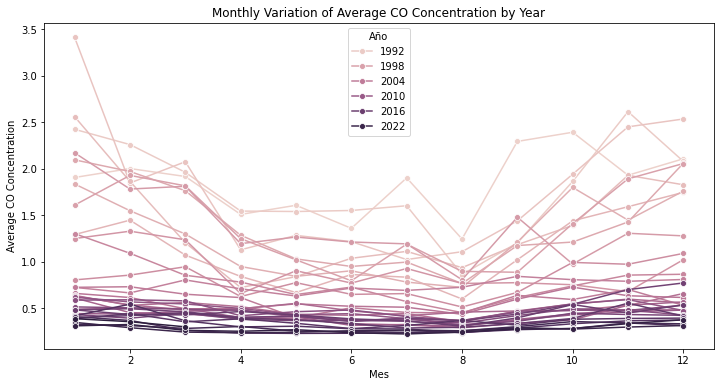

In [72]:


plt.figure(figsize=(12, 6))

# Suponiendo que quieres visualizar los datos de CO por mes a lo largo de diferentes años
sns.lineplot(x='month', y='CO', hue='year', data=df_barcelona_monthly, marker='o')

plt.xlabel('Mes')
plt.ylabel('Average CO Concentration')
plt.title('Monthly Variation of Average CO Concentration by Year')
plt.legend(title='Año')
plt.show()


In [73]:
df_barcelona_monthly.head()

,year,month,Date_time,CO,H2S,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2
0,1991,1,1991-01-16 00:00:00,1.907611,NaN,1.010993,2.232054,90.336583,54.922401,NaN,16.520400,NaN,NaN,99.980409,22.267669
1,1991,2,1991-02-14 12:00:00,2.003542,NaN,1.012583,2.058832,68.547303,59.197766,NaN,24.330005,NaN,NaN,107.250727,33.033688
2,1991,3,1991-03-15 16:48:00,1.918299,NaN,0.574157,1.620199,64.265870,64.247032,NaN,34.306394,NaN,NaN,128.388541,28.492038
3,1991,4,1991-04-15 12:00:00,1.510447,NaN,0.632437,1.879558,46.015532,56.479707,NaN,43.169687,NaN,NaN,91.090799,18.661847
4,1991,5,1991-05-16 00:00:00,1.608521,NaN,0.812923,1.992968,36.323430,60.708263,NaN,48.903898,NaN,NaN,74.056157,16.294773


Single temporal line visualization

In [76]:


# Asegúrate de que 'date' es una columna de tipo datetime
df_barcelona_monthly['Date_time'] = pd.to_datetime(df_barcelona_monthly['Date_time'])

# Encontrar la fecha más reciente en el DataFrame
last_date = df_barcelona_monthly['Date_time'].max()

# Calcular la fecha de corte para los últimos 5 años
cutoff_date = last_date - pd.DateOffset(years=5)

# Filtrar el DataFrame para los últimos 5 años
df_last_5_years = df_barcelona_monthly[df_barcelona_monthly['Date_time'] >= cutoff_date]


In [77]:
last_date = df_barcelona['Date_time'].max()
last_date

Timestamp('2024-03-07 04:00:00')

In [80]:
df_last_5_years['date'] = pd.to_datetime(df_last_5_years[['year', 'month']].assign(DAY=1))


<ipython-input-80-72ee18face1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_5_years['date'] = pd.to_datetime(df_last_5_years[['year', 'month']].assign(DAY=1))


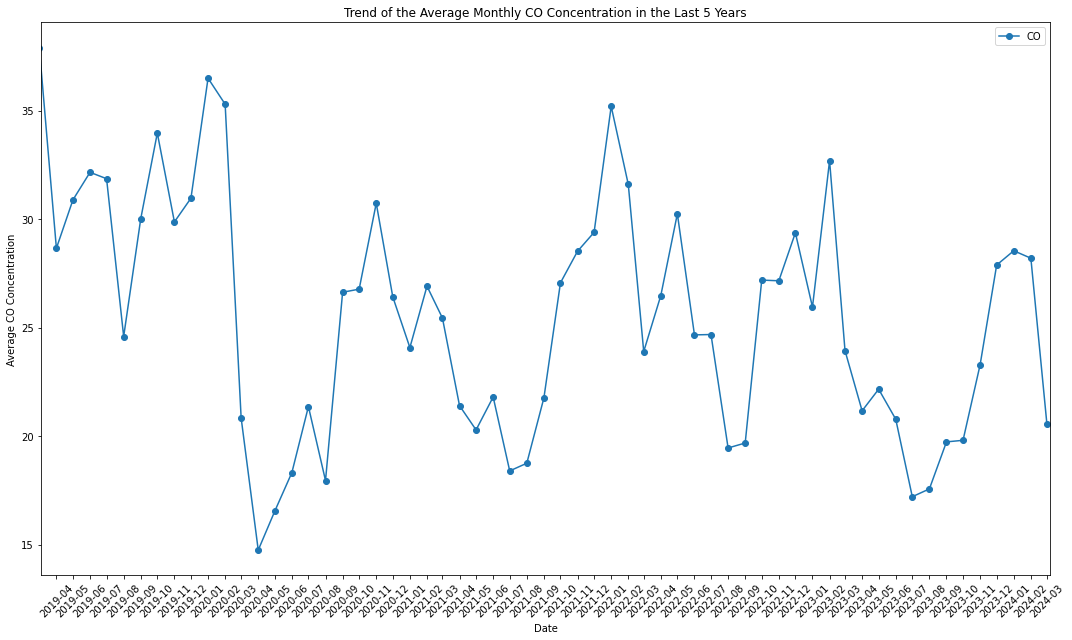

In [82]:
plt.figure(figsize=(15, 9))
plt.plot(df_last_5_years['date'], df_last_5_years['NO2'], label='CO', marker='o', linestyle='-')

# Formatear el eje X para mostrar año y mes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Ajustar los límites del eje X para enfocar en los últimos 5 años
plt.xlim(cutoff_date, last_date)

# Ajustes adicionales para mejorar la legibilidad
plt.xlabel('Date')
plt.ylabel('Average CO Concentration')
plt.title('Trend of the Average Monthly CO Concentration in the Last 5 Years')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad
plt.legend()
plt.tight_layout()  # Ajusta automáticamente los parámetros de subtrama para que quepan bien las etiquetas
plt.show()



<bound method NDFrame.describe of          CODI EOI                    NOM ESTACIO   CO  H2S  HCNM  HCT     NO  \
0         8019003        Barcelona (St. Gervasi)  3.0  NaN   NaN  NaN  140.0   
1         8019003        Barcelona (St. Gervasi)  5.3  NaN   NaN  NaN  195.0   
2         8019003        Barcelona (St. Gervasi)  3.7  NaN   NaN  NaN  177.0   
3         8019003        Barcelona (St. Gervasi)  6.1  NaN   NaN  NaN  355.0   
4         8019003        Barcelona (St. Gervasi)  5.6  NaN   NaN  NaN  328.0   
...           ...                            ...  ...  ...   ...  ...    ...   
1565136   8019058  Barcelona (Observatori Fabra)  NaN  NaN   NaN  NaN    1.0   
1565137   8019058  Barcelona (Observatori Fabra)  NaN  NaN   NaN  NaN    1.0   
1565138   8019058  Barcelona (Observatori Fabra)  NaN  NaN   NaN  NaN    1.0   
1565139   8019058  Barcelona (Observatori Fabra)  NaN  NaN   NaN  NaN    1.0   
1565140   8019058  Barcelona (Observatori Fabra)  NaN  NaN   NaN  NaN    1.0   

     

2. CORRELATION MATRIX

In [85]:
selected_columns = ['CO', 'H2S', 'NO', 'NO2', 'O3']  # Add or remove column names as needed
selected_df = df_barcelona[pollutants]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_df.corr()

# Print the correlation matrix
print(correlation_matrix)

             CO       H2S      HCNM       HCT        NO       NO2       NOX  \
CO     1.000000  0.499983  0.374461  0.274033  0.757100  0.458172  0.763390   
H2S    0.499983  1.000000       NaN       NaN  0.519321  0.523777       NaN   
HCNM   0.374461       NaN  1.000000  0.910145  0.390838  0.242087       NaN   
HCT    0.274033       NaN  0.910145  1.000000  0.287546  0.210178       NaN   
NO     0.757100  0.519321  0.390838  0.287546  1.000000  0.558465  0.954391   
NO2    0.458172  0.523777  0.242087  0.210178  0.558465  1.000000  0.850550   
NOX    0.763390       NaN       NaN       NaN  0.954391  0.850550  1.000000   
O3    -0.331251 -0.244714 -0.124868 -0.080788 -0.434663 -0.632949 -0.593471   
PM10   0.362702  0.999646       NaN       NaN  0.399963  0.417138  0.428298   
PM2.5  0.415898  0.578600       NaN       NaN  0.485998  0.537208  0.364439   
PS     0.443248       NaN  0.355851  0.318134  0.433594  0.454317       NaN   
SO2    0.545060  0.335737  0.298671  0.188830  0.402

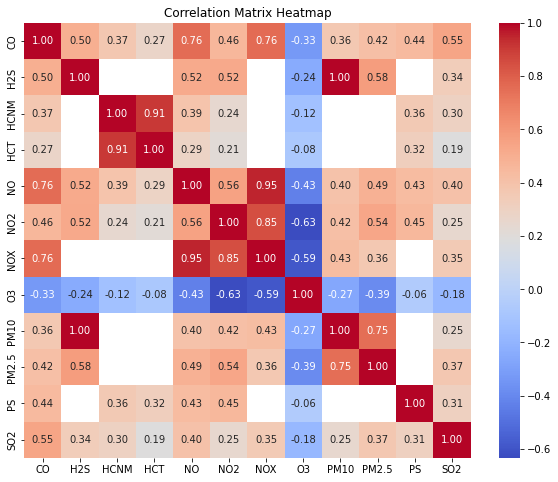

In [86]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

3.BOX PLOTS (Variance analytics)

In [ ]:
df_barcelona_5_years = pd.read_csv('./data/df_Barcelona_pivoted_5_years.csv')

df_barcelona_5_years['NO'] = pd.to_numeric(df_barcelona_5_years['NO'], errors='coerce')  # Convert to float, coerce errors
#df_barcelona_5_years.dropna(subset=['NO', 'NOM ESTACIÓ'], inplace=True)  # Drop rows where 'NO' or 'NOM ESTACIÓ' is NaN

# Create the boxplot
plt.figure(figsize=(12, 6))  # Adjust the size of the plot as necessary
boxplot = sns.boxplot(x='NOM ESTACIÓ', y='NO', data=df_barcelona_5_years)
plt.xticks(rotation=45)  # Rotate station names for better visibility if needed
plt.title('Distribution of NO Levels by Station')
plt.ylabel('NO Concentration')
plt.xlabel('Station Name')